<a href="https://colab.research.google.com/github/Vinay-gupta9/Bitcoin-Price-Prediction/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Prediction**
# **By Vinay Gupta**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bitcoin_price_Training - Training.csv to bitcoin_price_Training - Training.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "bitcoin_price_Training - Training.csv" with length 111221 bytes


In [5]:
uploaded

{'bitcoin_price_Training - Training.csv': b'Date,Open,High,Low,Close,Volume,Market Cap\r\n"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"\r\n"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"\r\n"Jul 29, 2017",2807.02,2808.76,2692.8,2726.45,"803,746,000","46,246,700,000"\r\n"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"\r\n"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"\r\n"Jul 26, 2017",2577.77,2610.76,2450.8,2529.45,"937,404,000","42,455,000,000"\r\n"Jul 25, 2017",2757.5,2768.08,2480.96,2576.48,"1,460,090,000","45,410,100,000"\r\n"Jul 24, 2017",2732.7,2777.26,2699.19,2754.86,"866,474,000","44,995,600,000"\r\n"Jul 23, 2017",2808.1,2832.18,2653.94,2730.4,"1,072,840,000","46,231,100,000"\r\n"Jul 22, 2017",2668.63,2862.42,2657.71,2810.12,"1,177,130,000","43,929,600,000"\r\n"Jul 21, 2017",2838.41,2838.41,2621.85,2667.76,"1,489,450,000","46,719,000,000"\r\n"Jul 20, 2017",

In [6]:
import io

In [10]:
read_data = pd.read_csv(io.BytesIO(uploaded['bitcoin_price_Training - Training.csv']))
read_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [11]:
read_data.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [12]:
read_data["Close"]

0       2875.34
1       2757.18
2       2726.45
3       2809.01
4       2671.78
         ...   
1551     105.21
1552     116.99
1553     139.00
1554     144.54
1555     134.21
Name: Close, Length: 1556, dtype: float64

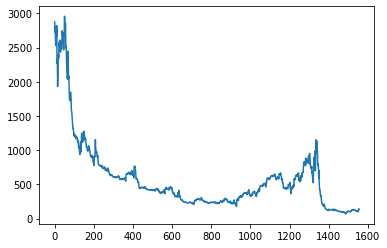

In [13]:
read_data["Close"].plot()

In [14]:
#Reverse Timeseries
#a[::-1]
reverse_data = read_data["Close"][::-1]

In [15]:
reverse_data

1555     134.21
1554     144.54
1553     139.00
1552     116.99
1551     105.21
         ...   
4       2671.78
3       2809.01
2       2726.45
1       2757.18
0       2875.34
Name: Close, Length: 1556, dtype: float64

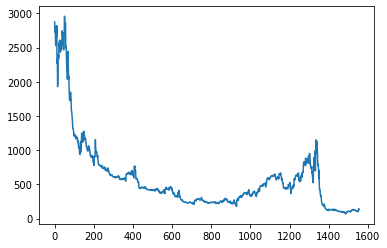

In [16]:
reverse_data.plot()

In [17]:
# fix time line
reverse_data.reset_index(drop = True)

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

In [18]:
series_data = read_data["Close"]
series_data.index = read_data["Date"]
series_data

Date
Jul 31, 2017    2875.34
Jul 30, 2017    2757.18
Jul 29, 2017    2726.45
Jul 28, 2017    2809.01
Jul 27, 2017    2671.78
                 ...   
May 02, 2013     105.21
May 01, 2013     116.99
Apr 30, 2013     139.00
Apr 29, 2013     144.54
Apr 28, 2013     134.21
Name: Close, Length: 1556, dtype: float64

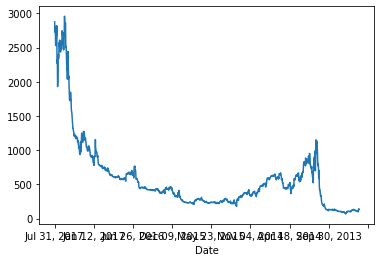

In [19]:
series_data.plot()

In [20]:
reverse_series_data = series_data[::-1]
reverse_series_data

Date
Apr 28, 2013     134.21
Apr 29, 2013     144.54
Apr 30, 2013     139.00
May 01, 2013     116.99
May 02, 2013     105.21
                 ...   
Jul 27, 2017    2671.78
Jul 28, 2017    2809.01
Jul 29, 2017    2726.45
Jul 30, 2017    2757.18
Jul 31, 2017    2875.34
Name: Close, Length: 1556, dtype: float64

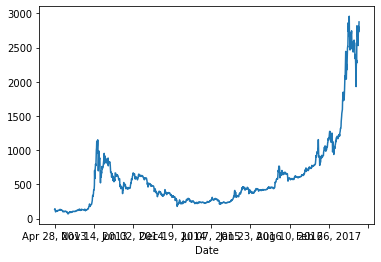

In [21]:
reverse_series_data.plot()